<h1>Table of content</h1>

* [1 Import libraries and Functions](#1-Import-)
* [2 Data description](#2-Data-description)
* [3 Data discovery](#3-Data-discovery)
* [4 Project scoping](#-4-Project-scoping)
* [5 Data structuring](#5-Data-structuring)
* [6 Data Cleaning](#6-Data-Cleaning)
* [7 Data analysis](#7-Data-analysis)
* [8 EDA](#8-EDA)

<h2>1 Import </h2>

___

___

<h3>1.1 Import libraries</h3>

___

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

___

<h3>1.2 Import my functions</h3>

___



In [3]:
# My functions
def two_cat_pivot(datasett,roww, columnn, valuess, aggregation_type, number_row, number_column):
   dataset = datasett
   if valuess == "Count":
     dataset['Count'] = 1
   if number_row > dataset[roww].nunique():
       number_row = dataset[roww].nunique()
   if number_column > dataset[columnn].nunique():
       number_column = dataset[columnn].nunique()   
   number = 1 + number_row
   pipi = pd.pivot_table(data=dataset,values=valuess, index=[roww],
                       columns=[columnn], aggfunc=aggregation_type ,margins=True,margins_name="Grand total")
   po = pipi.sort_values(by="Grand total",axis=1,ascending=False)
   po= po.sort_values(by="Grand total",axis=0,ascending=False).head(number)
   po = po.drop("Grand total",axis=1)
   po = po.drop("Grand total",axis=0)
   po.loc["Grand total"] = 0

   # for i in range(len(po.columns)):
   #   po.iloc[number-1,i] = po[po.columns[i]].sum()
   po.iloc[number-1, :] = po.sum(axis=0)    # from AI the previuos code is my original work
   po= po.sort_values(by="Grand total",axis=1,ascending=False)
   po=po.iloc[:,:number_column]
   po["Grand total"] = 0
   po["Grand total"] = po.apply(lambda row: row.sum(), axis=1)   # from AI the under code is my original work
   # for i in range(len(po.index)):
   #    po["Grand total"].iloc[i] = po.loc[po.index[i],:].sum()
   if valuess == "Count":
     dataset = dataset.drop("Count", axis=1)
   return po.fillna("")
#****************************************************************************************************************
def cat_frequancy(dataset,column, number):
 datasett = dataset             
 col=column
 Top_values = number
 for i in range(len(col)):     
   ga = sns.color_palette("Blues",n_colors=Top_values)
   ga.reverse()
   sns.countplot(data=datasett,y=col[i], order = datasett[col[i]].value_counts().iloc[:Top_values].index ,width=0.5,palette =ga)
           #, hue=col[i], hue_order = dataset[col[i]].value_counts().iloc[:Top_values].index ) 
   plt.show()
#***************************************************************************
def changetype(dataset,typebefore,typeafter):
 for col in dataset.columns:
  if dataset[col].dtypes == typebefore:
     dataset[col] = dataset[col].astype(typeafter)
#****************************************************************************
def null_atfirst(dataset,column,number):
    
 pd.set_option("display.max_rows", None)
 datasett = dataset.sort_values(column, na_position='first').head(number)
 
 print("Note you must write pd.set_option('display.min_rows', 10) and pd.set_option('display.min_rows', 15) in different cell")
 return datasett 
#********************************************************************************
def reorder(dataset,column,aftercolumn):
    ahmed = list(dataset.columns)
    ahmed2 = ahmed.index(column)
    ahmed3 = ahmed.index(aftercolumn)
    listt=[]
    for i in range(len(vgs.columns)):
        listt.append(i)
    listt.pop(ahmed2)
    listt.insert(ahmed3,ahmed2)
    vgs_reprder = dataset.iloc[:,listt]
    return vgs_reprder
#************************************************************************
def trend(dataset,column,time,scale,legend_number,scale_gap, title):
    
 
 Year_Global_Sales = dataset.groupby(by=[column,time])[scale].sum()
 Year_Global_Sales
 Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
 ll= list(dataset.groupby(by=[column])[scale].sum().sort_values(ascending = False).iloc[:legend_number].index)
 ll = ll[:legend_number]

 Year_Global_Salesss = Year_Global_Saless[Year_Global_Saless[column].isin(ll)].sort_values(by=time)
 aa = Year_Global_Salesss[time].sort_values(ascending = True).unique()
 plt.figure(figsize=(20,5))
 sns.lineplot(data=Year_Global_Salesss, x=time, y=scale,hue=Year_Global_Salesss[column],palette="tab10",
            hue_order = dataset.groupby(by=[column])[scale].sum().sort_values(ascending = False).iloc[:legend_number].index) 
 plt.xticks(aa[::scale_gap].unique(), rotation=70,fontsize = 12)
 plt.title(title)
 plt.show()

<hr>
<h3>1.3 import dataset</h3>
<hr>


In [4]:

vgs = pd.read_csv(r"C:\Users\Q4C\Desktop\مواد\Job\Portfolio\Project1_Video_Game_Sales\Dataset\Raw dataset.csv")

<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>

<h2>2 Data description</h2>
<hr>

<h4>What is the businesses context? </h4>
<p>This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com*1.
    
The video game industry is the tertiary and quaternary sectors of the entertainment industry that specialize in the development, marketing, distribution, monetization, and consumer feedback of video games.</p>

<h4>What is the source of the dataset? </h4>
<p>VGChartz (Video Game Charts) is a business intelligence and research firm, Founded in 2005 by Brett Walton. VGChartz publishes video game hardware estimates every week and hosts an ever-expanding game database with over 55,000 titles listed, featuring up-to-date shipment information and legacy sales data. The VGChartz.com website provides consumers with a range of content from news and sales features, to reviews and articles, to social networking and a community forum.</p>

<h4>What is the businesses impact? </h4>
<p>By this analysis I will answer one main question, If I am a developer and I want to create a video game that release on the beginning of 2018, what is the best choices to do that? </p>

<h4>The Dataset </h4>
<p>This dataset downloaded from kaggle*2 and its contain 16598 rows × 11 columns:</p>
<ol>
  <li>Rank - Ranking of overall sales</li>
  <li>Name - The games name</li>
  <li>Platform - Platform of the games release </li>
  <li>Year - Year of the game's release</li>
  <li>Genre - Genre of the game</li>
  <li>Publisher - Publisher of the game</li>
  <li>NA_Sales - Sales in North America (in millions)</li>
  <li>EU_Sales - Sales in Europe (in millions)</li>
  <li>JP_Sales - Sales in Japan (in millions)</li>
  <li>Other_Sales - Sales in the rest of the world (in millions)</li>
  <li>Global_Sales - Total worldwide sales</li>

</ol>





<h4>References </h4>

[*1](www.vgchartz.com)

[*2](https://www.kaggle.com/datasets/gregorut/videogamesales/data)

<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> . </div>
<div style="background-color: lightblue"> ↓↓↓↓ </div>

<h2>3 Data discovery</h2>
<hr>

In [5]:
pd.set_option("display.max_columns",None)
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
vgs.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [8]:
des = vgs.describe()
des.iloc[:,2:]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
vgs.describe(include="object")


,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [10]:
vgs["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
vgs["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
print(vgs["Year"].min() , "-",vgs["Year"].max())

1980.0 - 2020.0


In [13]:
nulldata = vgs.isnull().sum()
nulldata[nulldata>0]

Year         271
Publisher     58
dtype: int64

In [14]:
null_atfirst(vgs,"Publisher",271)


Note you must write pd.set_option('display.min_rows', 10) and pd.set_option('display.min_rows', 15) in different cell


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [15]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 10)

In [16]:
null_atfirst(vgs,"Year",271)

Note you must write pd.set_option('display.min_rows', 10) and pd.set_option('display.min_rows', 15) in different cell


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [17]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 10)

<h2> 4 Project scoping</h2>
<hr>

<h4>What is the businesses context? </h4>
<p>This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com*1.
    
The video game industry is the tertiary and quaternary sectors of the entertainment industry that specialize in the development, marketing, distribution, monetization, and consumer feedback of video games.

The development side of the industry is made up of six connected and distinctive layers:

1.	Capital and publishing layer: involved in paying for development of new games and seeking returns through licensing of the properties.
2.	Product and talent layer: includes developers, designers and artists, who may be working under individual contracts or as part of in-house development teams.
3.	Production and tools layer: generates content production tools, game development middleware, customizable game engines, and production management tools.
4.	Distribution layer: or the "publishing" industry, involved in generating and marketing catalogs of games for retail and online distribution.
5.	Hardware (or Virtual Machine or Software Platform) layer: or the providers of the underlying platform, which may be console-based, accessed through online media, or accessed through mobile devices such as smartphones. This layer includes network infrastructure and non-hardware platforms such as virtual machines (such as Java or Flash), or software platforms such as browsers or Facebook.
6.	End-users layer: or the players of the games.

</p>

<h4>What is the businesses impact? </h4>
<p>By this analysis i will answer one main question, If i am a developer and i want to create a video game that release on the beginning of 2018, what is the best way to do that?

there are two path to begin developing the game:

<ol>
    <li>If we need to focus on game genre</li>
    <li>If we need to focus on the platform</li>
    
</ol>
We need to ask these questions:
* What is the best Genre for the game?
* What is the best Platform for the game?
* What is the best Publisher for the game?
* which country we should release the game first?


EDA
* What are the top 10 games sales in histroy and is there a pattern for best game every some year?  (Global_Sales)
* reanswer the previous questions for Platform.
* reanswer the previous questions for Genre
* reanswer the previous questions for Publisher.
* What is the trend over years?
* reanswer the previous questions by every country. 



</p>

<h4>The Dataset </h4>
<p>This dataset downloaded from kaggle*2 and its contain 16598 rows × 11 columns:</p>
<ol>
  <li>Rank - Ranking of overall sales</li>
  <li>Name - The games name</li>
  <li>Platform - Platform of the games release </li>
  <li>Year - Year of the game's release</li>
  <li>Genre - Genre of the game</li>
  <li>Publisher - Publisher of the game</li>
  <li>NA_Sales - Sales in North America (in millions)</li>
  <li>EU_Sales - Sales in Europe (in millions)</li>
  <li>JP_Sales - Sales in Japan (in millions)</li>
  <li>Other_Sales - Sales in the rest of the world (in millions)</li>
  <li>Global_Sales - Total worldwide sales</li>

</ol>





<h4>References </h4>

[*1](www.vgchartz.com)

[*2](https://www.kaggle.com/datasets/gregorut/videogamesales/data)

<h2>5 Data structuring</h2>
<hr>
<h4>reorder columns</h4>



In [18]:
vgs_reorder = reorder(vgs,"Year","Publisher")


In [19]:
changetype(vgs_reorder,"category","object")

In [20]:
vgs_reorder["Year"] = vgs_reorder["Year"].astype("Int64")

In [21]:

vgs_reorder.dtypes

Rank              int64
Name             object
Platform         object
Genre            object
Publisher        object
Year              Int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

<h2>6 Data Cleaning</h2>
<hr>

In [22]:
pd.set_option("display.min_rows",100)
vgs_reorder

,Rank,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,2006,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,1985,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,2008,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,2009,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,1996,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,Puzzle,Nintendo,1989,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,Platform,Nintendo,2006,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,Misc,Nintendo,2006,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,2009,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,Shooter,Nintendo,1984,26.93,0.63,0.28,0.47,28.31


<h4>How much are rows contain null values?</h4>
<hr>

In [23]:
#307 rows × 11 columns

vgs_reorder[vgs_reorder.isna().any(axis=1)]

,Rank,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,Sports,Electronic Arts,<NA>,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,Sports,Electronic Arts,<NA>,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,Action,Warner Bros. Interactive Entertainment,<NA>,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,Fighting,NaN,<NA>,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,Shooter,Atari,<NA>,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,Misc,Electronic Arts,<NA>,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,Adventure,Konami Digital Entertainment,<NA>,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,Action,LucasArts,<NA>,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,Shooter,Activision,<NA>,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,Misc,MTV Games,<NA>,1.35,0.56,0.00,0.20,2.11


In [24]:
vgs_reorder.isna().sum()

Rank              0
Name              0
Platform          0
Genre             0
Publisher        58
Year            271
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<h4>Delete null values</h4>
<hr>

In [25]:
vgs1 = vgs_reorder.dropna()


In [26]:
vgs1.isnull().sum()

Rank            0
Name            0
Platform        0
Genre           0
Publisher       0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

<h4>Duplicated rows</h4>
<hr>

In [27]:
vgs1[vgs1.duplicated()]

,Rank,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


<h4>Delete Duplicated rows</h4>
<hr>

In [28]:
vgs2_1 = vgs1.drop_duplicates()


In [29]:
# Note: the Years between 2017-2020 have a very missing value so i will delete it.
vgs2 = vgs2_1.drop(vgs2_1[vgs2_1["Year"] >2016].index , axis=0)

<h2>7 Data analysis</h2>

In [30]:
vgs2 = vgs2.sort_values("Global_Sales", ascending = False)
vgs2

,Rank,Name,Platform,Genre,Publisher,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,2006,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,1985,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,2008,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,2009,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,1996,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,Puzzle,Nintendo,1989,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,Platform,Nintendo,2006,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,Misc,Nintendo,2006,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,Platform,Nintendo,2009,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,Shooter,Nintendo,1984,26.93,0.63,0.28,0.47,28.31


<h5>best Genre</h5>
<p>What is the best Genre of all time?</p>

<h5>What is the best Genre for all time?</h5>

Text(0.5, 1.0, 'Genre by sales between 2013-2016')

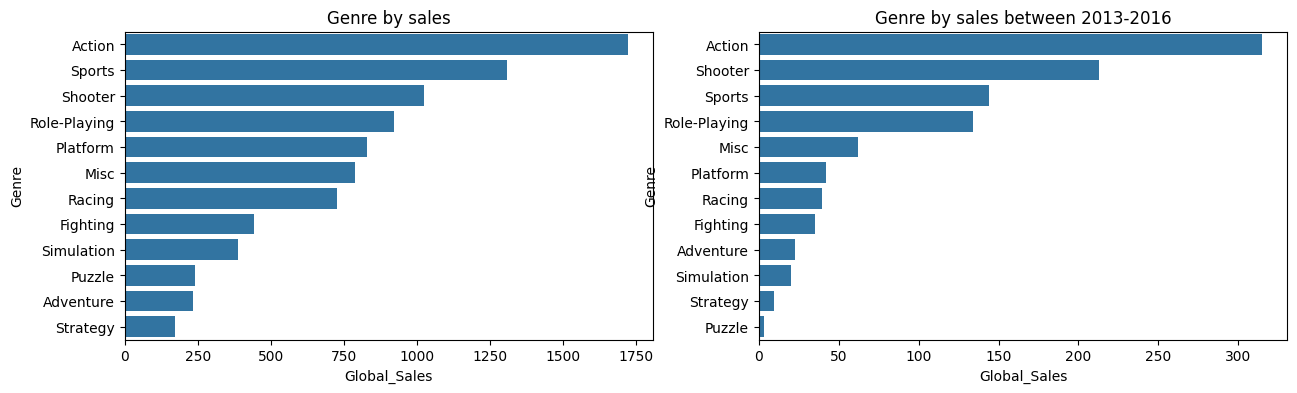

In [31]:
fig = plt.figure(figsize = (15,4))
axes = fig.subplots(1,2)

sns.barplot(data = vgs2,y="Genre",x= "Global_Sales",estimator='sum',errorbar=None, ax = axes[0],
            order=vgs2.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending = False).index)
axes[0].set_title("Genre by sales")
filter_2013_2016 = vgs2[vgs2["Year"].isin([2013,2014,2015,2016])]
sns.barplot(data = filter_2013_2016,y="Genre",x= "Global_Sales",estimator='sum',errorbar=None, ax = axes[1],
            order=filter_2013_2016.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending = False).index)
axes[1].set_title("Genre by sales between 2013-2016")

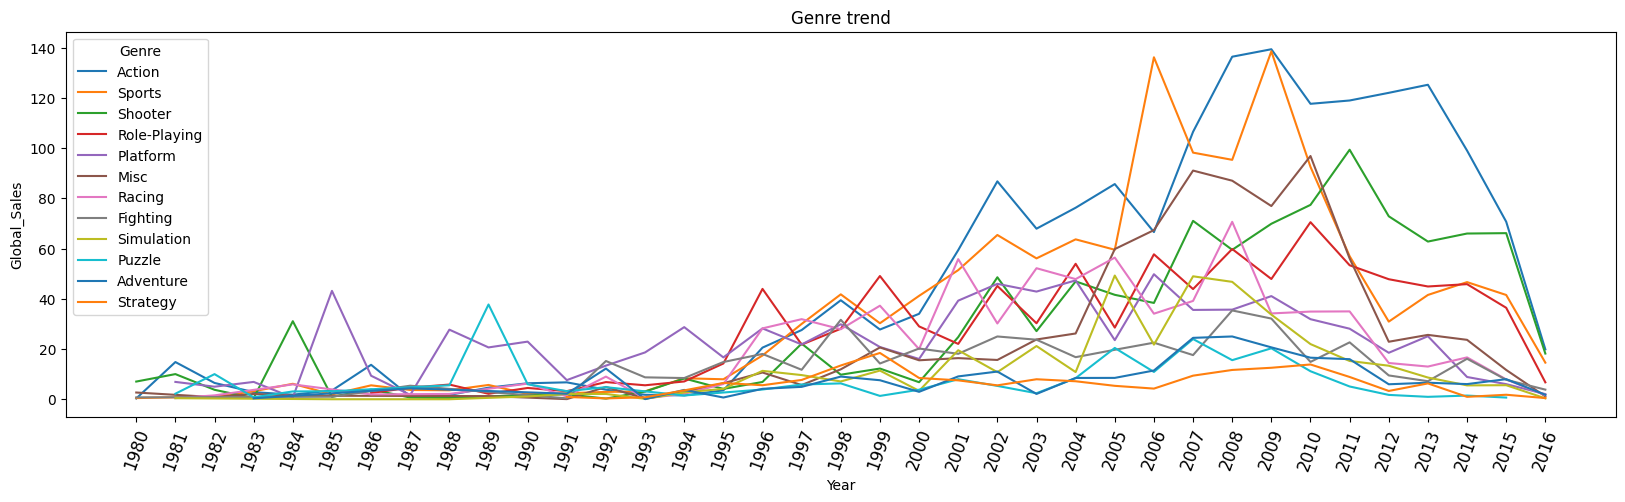

In [32]:
trend(dataset = vgs2,column="Genre",time="Year",scale="Global_Sales",legend_number=15,scale_gap=1,title="Genre trend")


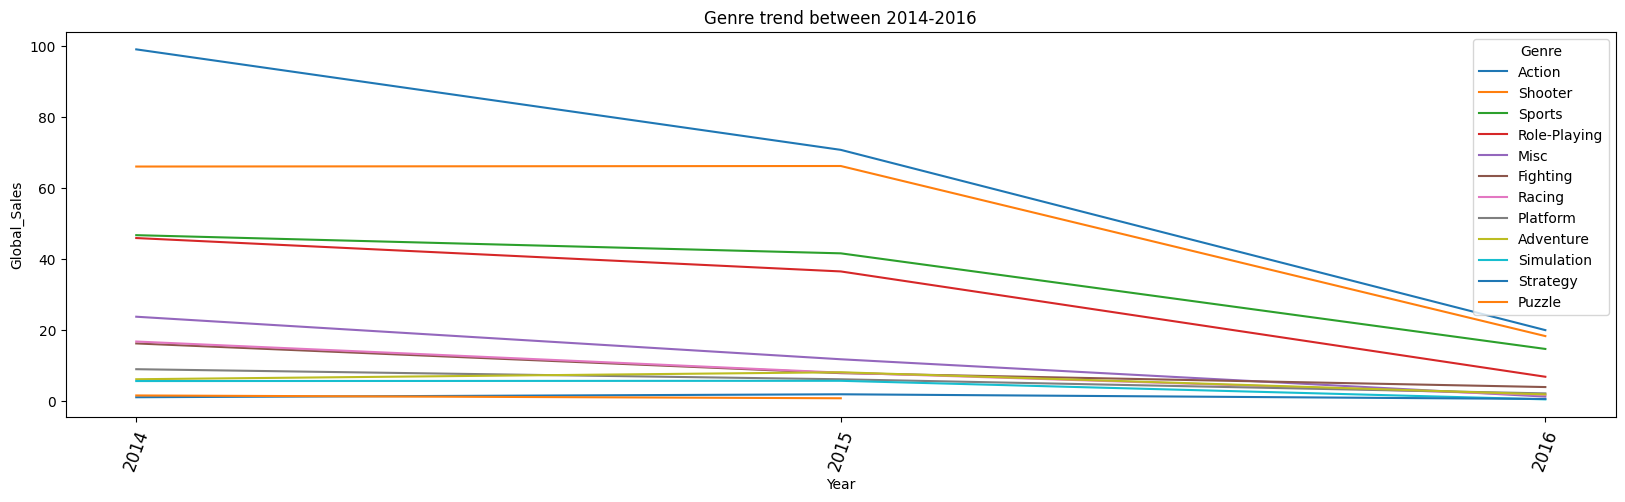

In [33]:
filter_2012_2016 = vgs2[vgs2["Year"].isin([2014,2015,2016])]
trend(dataset = filter_2012_2016,column="Genre",time="Year",scale="Global_Sales",legend_number=15,scale_gap=1, title ="Genre trend between 2014-2016")

<p>From the two chart we can see that the top 5 Genre at the last 5 years are:
<ol>
    <li>Action</li>
    <li>Shooter</li>
    <li>Sports</li>
    <li>Role_playing </li>
    <li>Misc</li>
    
</ol>
    
</p>

<h5>Now, what is the best platform for each Genre type fo for all time?</h5>

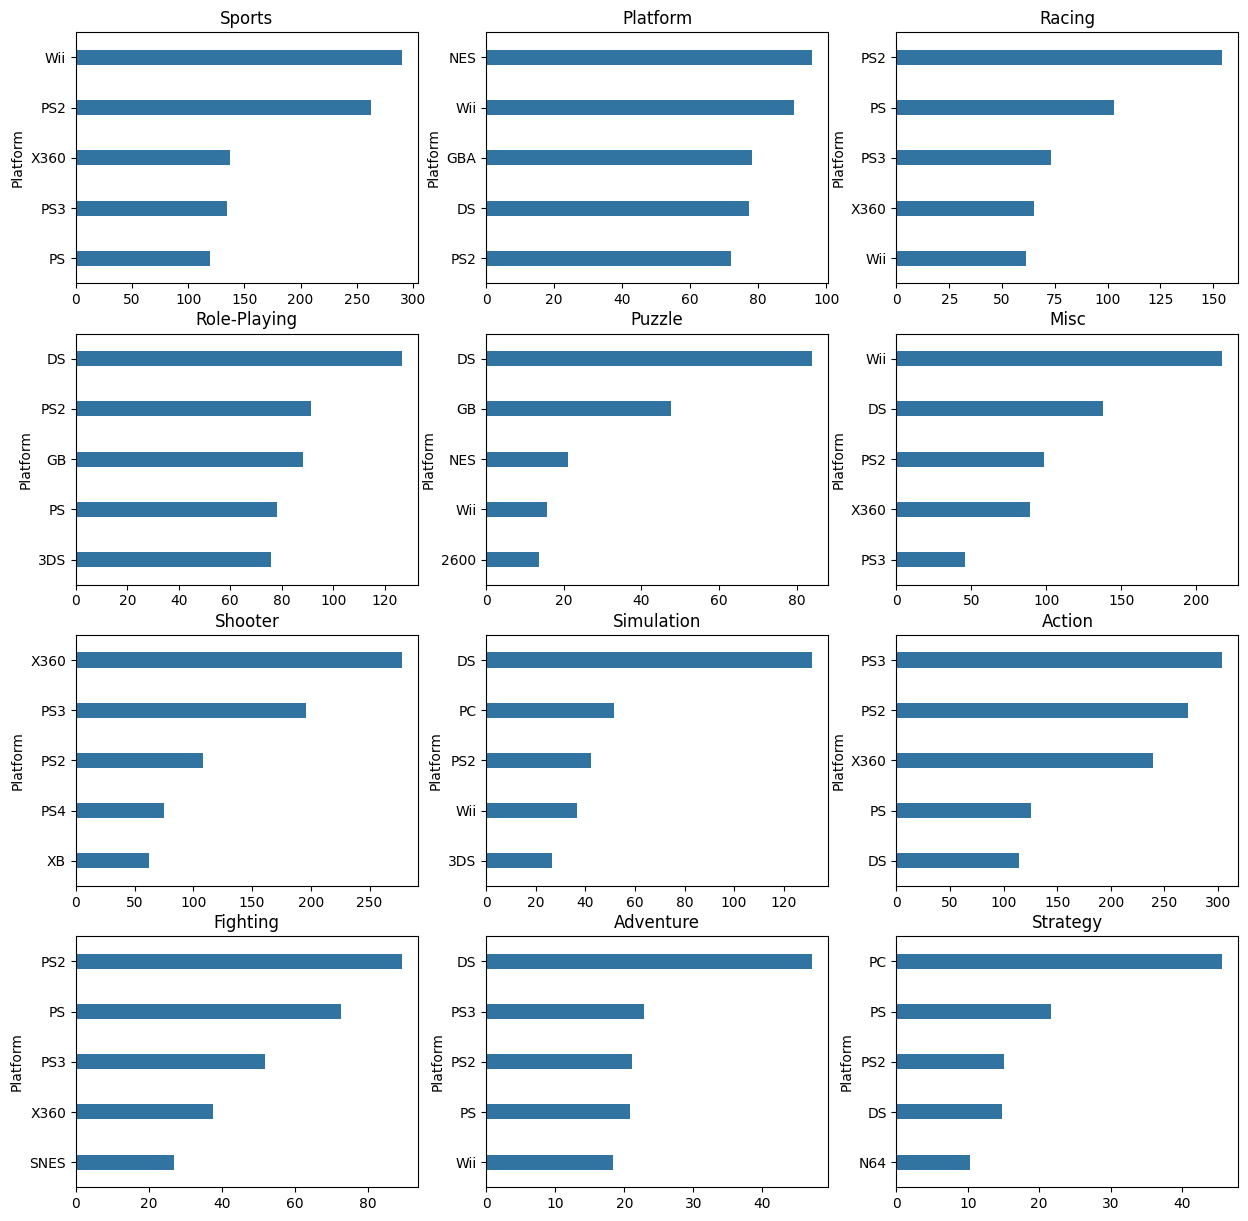

In [34]:
fig= plt.figure(figsize= (15,15))
axes= fig.subplots(4,3)
dataset= vgs2
column_main  = "Genre"
column_minor = "Platform"
for i in range(12):
    genra_unique = vgs2["Genre"].unique()
    dataset = vgs2[vgs2["Genre"] == genra_unique[i]]
    if i<3:
     axx = axes[0,i]
    elif   i>2 and i <6:
        axx = axes[1,i-3]
    elif    i>5 and i<9:
        axx = axes[2,i-6]
    elif    i>8 and i<12:
        axx = axes[3,i-9]
        
    sns.barplot(data = dataset,y=column_minor,x= "Global_Sales",estimator='sum',errorbar=None, ax= axx,width=0.3,
            order=dataset.groupby(by=[column_minor])['Global_Sales'].sum().sort_values(ascending = False).iloc[:5].index)
    if i<3:
     axes[0,i].set_xlabel("")
     axes[0,i].set_title(genra_unique[i])
    elif   i>2 and i <6:
     axes[1,i-3].set_xlabel("")
     axes[1,i-3].set_title(genra_unique[i])
    elif    i>5 and i<9:
     axes[2,i-6].set_xlabel("")
     axes[2,i-6].set_title(genra_unique[i]) 
    elif    i>8 and i<12:
      axes[3,i-9].set_xlabel("")
      axes[3,i-9].set_title(genra_unique[i])
    
#axes[0].set_title("Genre by sales")

<h5>Now, what is the best platform for each Genre type between 2014-2016?</h5>

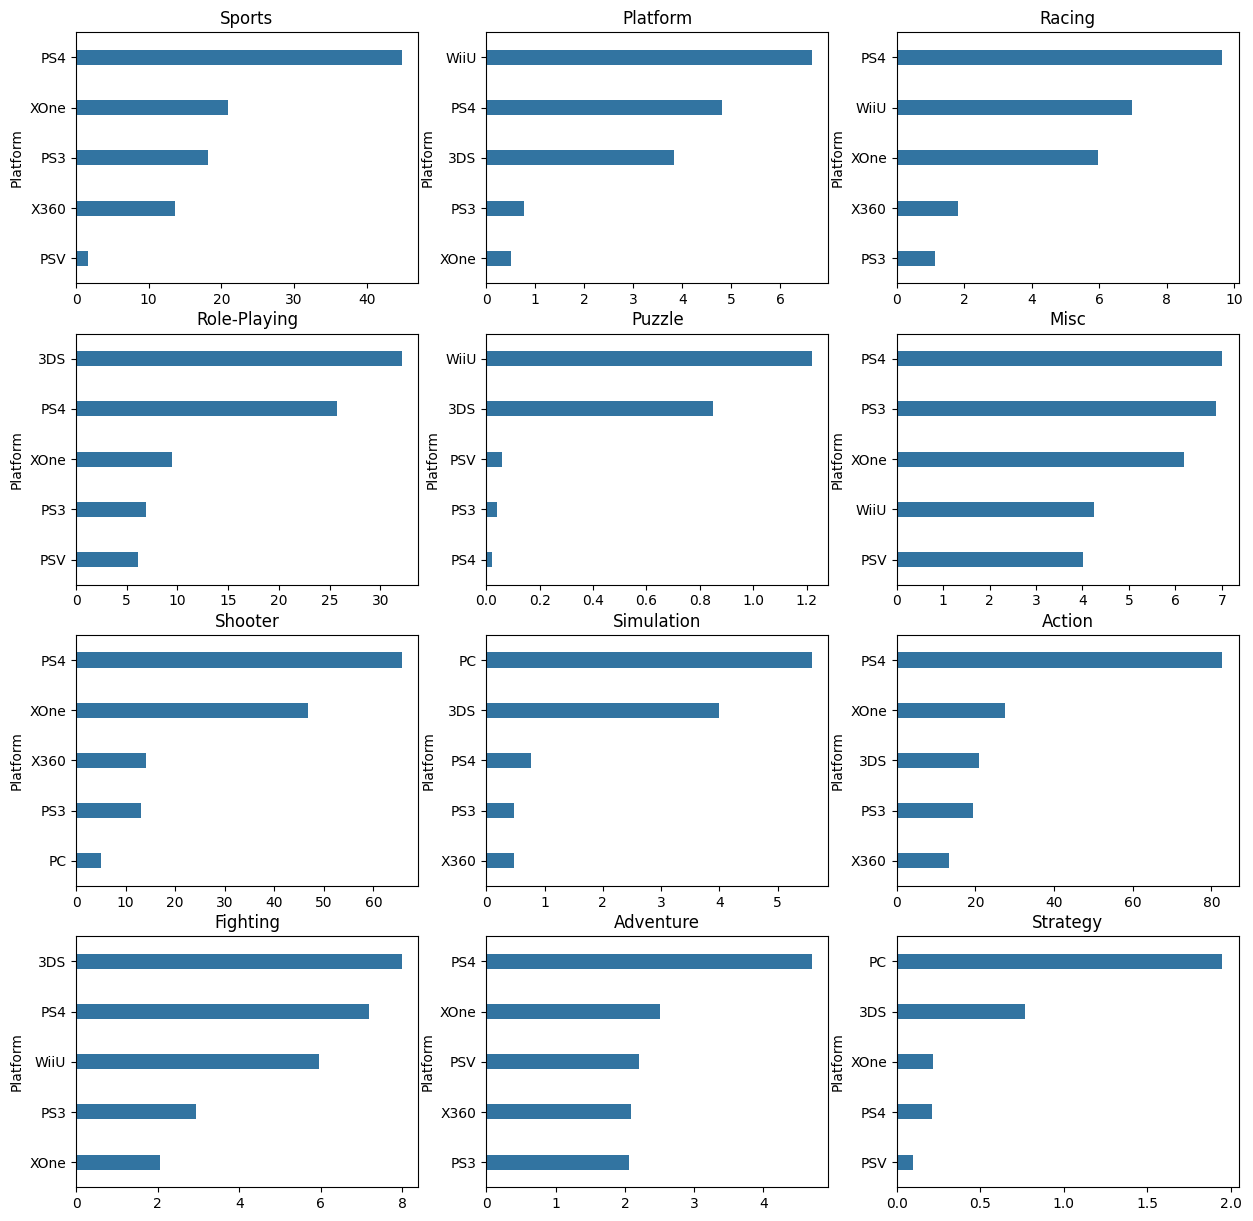

In [35]:
fig= plt.figure(figsize= (15,15))
axes= fig.subplots(4,3)
dataset= vgs2
column_main  = "Genre"
column_minor = "Platform"
for i in range(12):
    genra_unique = vgs2["Genre"].unique()
    dataset = vgs2[(vgs2["Genre"] == genra_unique[i]) & (vgs2["Year"].isin([2014,2015,2016]))]
    if i<3:
     axx = axes[0,i]
    elif   i>2 and i <6:
        axx = axes[1,i-3]
    elif    i>5 and i<9:
        axx = axes[2,i-6]
    elif    i>8 and i<12:
        axx = axes[3,i-9]
        
    sns.barplot(data = dataset,y=column_minor,x= "Global_Sales",estimator='sum',errorbar=None, ax= axx,width=0.3,
            order=dataset.groupby(by=[column_minor])['Global_Sales'].sum().sort_values(ascending = False).iloc[:5].index)
    if i<3:
     axes[0,i].set_xlabel("")
     axes[0,i].set_title(genra_unique[i])
    elif   i>2 and i <6:
     axes[1,i-3].set_xlabel("")
     axes[1,i-3].set_title(genra_unique[i])
    elif    i>5 and i<9:
     axes[2,i-6].set_xlabel("")
     axes[2,i-6].set_title(genra_unique[i]) 
    elif    i>8 and i<12:
      axes[3,i-9].set_xlabel("")
      axes[3,i-9].set_title(genra_unique[i])




<h5>What is the best Platform for all time?</h5>

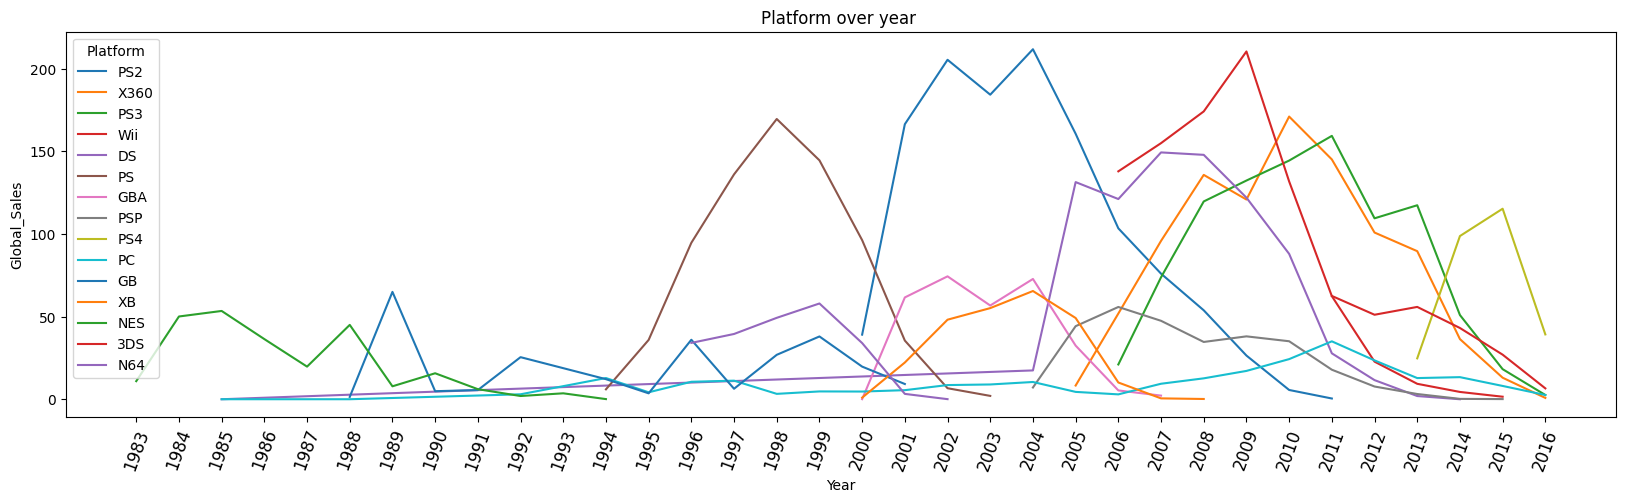

In [36]:
trend(dataset = vgs2,column="Platform",time="Year",scale="Global_Sales",legend_number=15,scale_gap=1,title="Platform over year ")

<h5>What is the best Platform between 2014-2016?</h5>

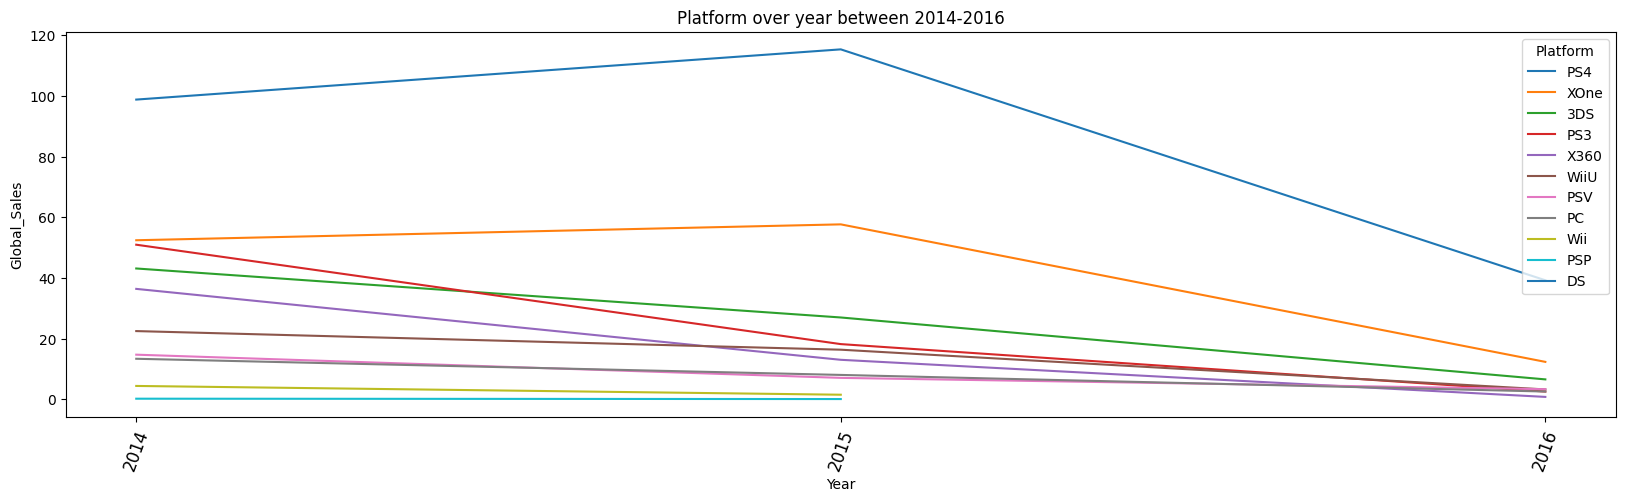

In [37]:
filter_2010_2016 = vgs2[vgs2["Year"].isin([2014,2015,2016])]
trend(dataset = filter_2010_2016,column="Platform",time="Year",scale="Global_Sales",legend_number=15,scale_gap=1,title="Platform over year between 2014-2016")

<p>between 2014-2016 the best platforms are:
<ol>
    <li>PS4</li>
    <li>XOne</li>
</ol>
    </p>

<h5>Now, what is the best Genre for each Platform type between 2014-2016?</h5>

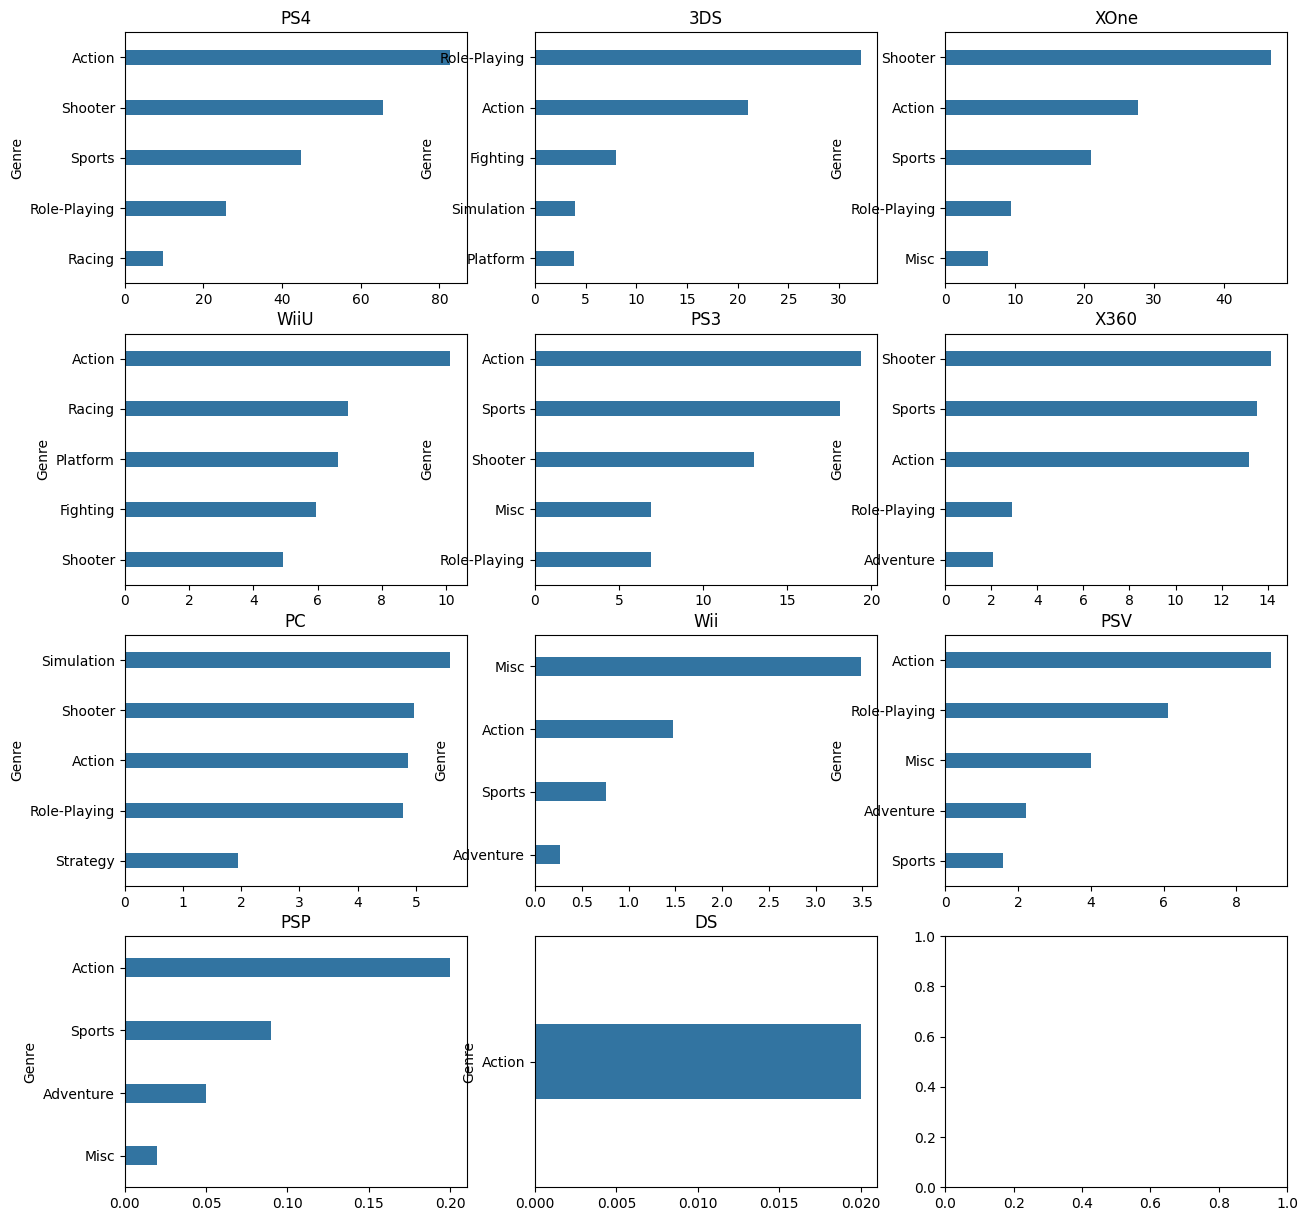

In [51]:
fig= plt.figure(figsize= (15,15))
axes= fig.subplots(4,3)
dataset= vgs2
column_main  = "Platform"
column_minor = "Genre"
for i in range(11):
    genra_unique =  vgs2[vgs2["Year"].isin([2014,2015,2016])]
    genra_unique= genra_unique[column_main].unique()
    dataset = vgs2[(vgs2[column_main] == genra_unique[i]) & (vgs2["Year"].isin([2014,2015,2016]))]
    if i<3:
     axx = axes[0,i]
    elif   i>2 and i <6:
        axx = axes[1,i-3]
    elif    i>5 and i<9:
        axx = axes[2,i-6]
    elif    i>8 and i<12:
        axx = axes[3,i-9]
        
    sns.barplot(data = dataset,y=column_minor,x= "Global_Sales",estimator='sum',errorbar=None, ax= axx,width=0.3,
            order=dataset.groupby(by=[column_minor])['Global_Sales'].sum().sort_values(ascending = False).iloc[:5].index)
    if i<3:
     axes[0,i].set_xlabel("")
     axes[0,i].set_title(genra_unique[i])
    elif   i>2 and i <6:
     axes[1,i-3].set_xlabel("")
     axes[1,i-3].set_title(genra_unique[i])
    elif    i>5 and i<9:
     axes[2,i-6].set_xlabel("")
     axes[2,i-6].set_title(genra_unique[i]) 
    elif    i>8 and i<12:
      axes[3,i-9].set_xlabel("")
      axes[3,i-9].set_title(genra_unique[i])

<h5>What is the best Publisher for the game?</h5>

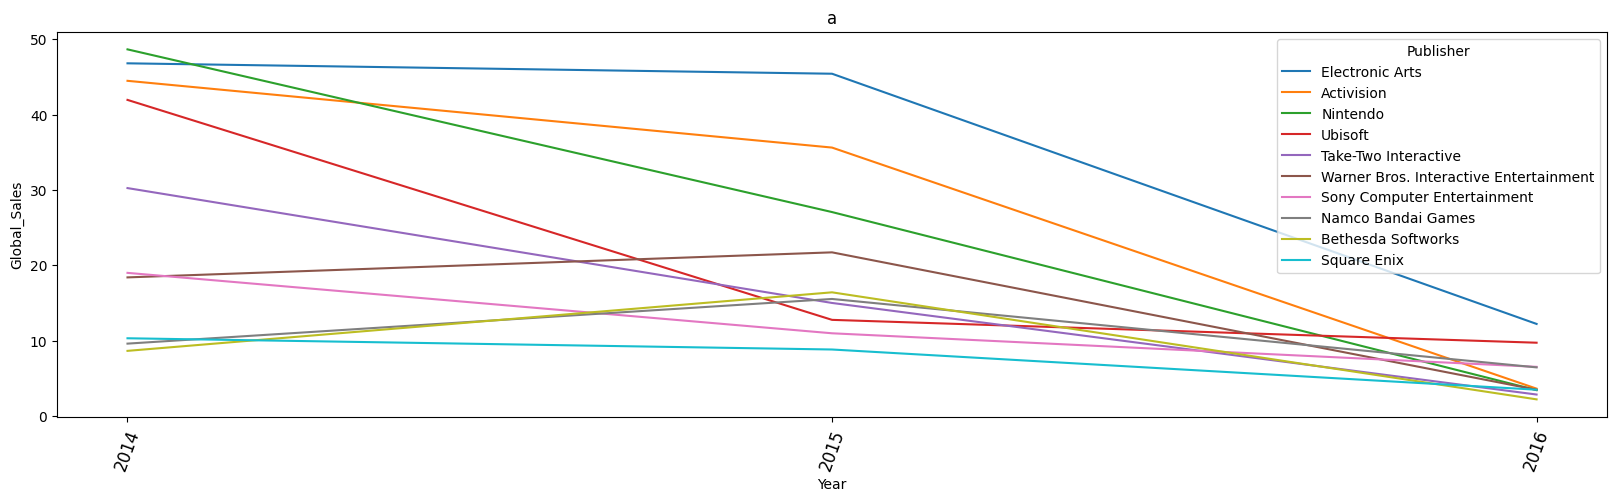

In [43]:
filter_2010_2016 = vgs2[vgs2["Year"].isin([2014,2015,2016])]
trend(dataset = filter_2010_2016,column="Publisher",time="Year",scale="Global_Sales",legend_number=10,scale_gap=1, title = "a")


<p>The best Publishers are:
<ol>
    <li>Electronic Arts</li>
    <li>Nintendo</li>
    <li>Activision</li>
</ol>
    
</p>

<h5>Now, what is the best Publisher for each Genre type between 2014-2016?</h5>

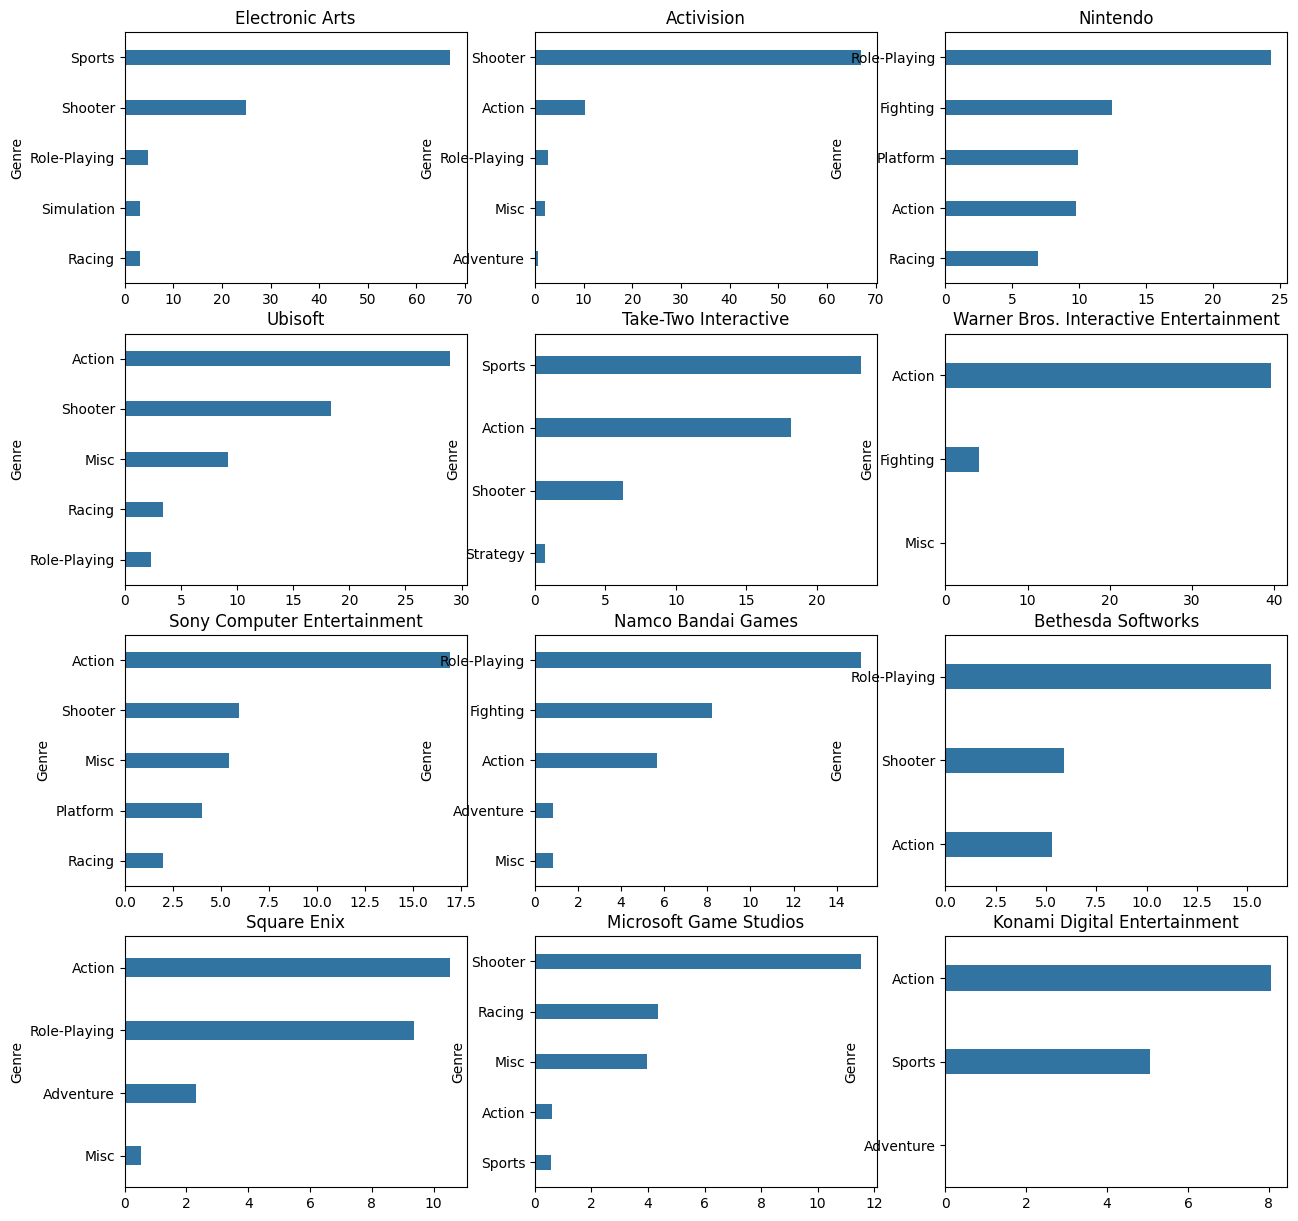

In [71]:
fig= plt.figure(figsize= (15,15))
axes= fig.subplots(4,3)
dataset= vgs2
column_main  = "Publisher"
column_minor = "Genre"
for i in range(12):
    genra_unique =  vgs2[vgs2["Year"].isin([2014,2015,2016])]
    
    bb =list(genra_unique.groupby(by=["Publisher"])["Global_Sales"].sum().sort_values(ascending = False).iloc[:12].index)
    genra_unique= bb
    
    dataset = vgs2[(vgs2[column_main] == genra_unique[i]) & (vgs2["Year"].isin([2014,2015,2016]))]
    if i<3:
     axx = axes[0,i]
    elif   i>2 and i <6:
        axx = axes[1,i-3]
    elif    i>5 and i<9:
        axx = axes[2,i-6]
    elif    i>8 and i<12:
        axx = axes[3,i-9]
        
    sns.barplot(data = dataset,y=column_minor,x= "Global_Sales",estimator='sum',errorbar=None, ax= axx,width=0.3,
            order=dataset.groupby(by=[column_minor])['Global_Sales'].sum().sort_values(ascending = False).iloc[:5].index)
    if i<3:
     axes[0,i].set_xlabel("")
     axes[0,i].set_title(genra_unique[i])
    elif   i>2 and i <6:
     axes[1,i-3].set_xlabel("")
     axes[1,i-3].set_title(genra_unique[i])
    elif    i>5 and i<9:
     axes[2,i-6].set_xlabel("")
     axes[2,i-6].set_title(genra_unique[i]) 
    elif    i>8 and i<12:
      axes[3,i-9].set_xlabel("")
      axes[3,i-9].set_title(genra_unique[i])

<h5>Now, what is the best Publisher for each Platform type between 2014-2016?</h5>

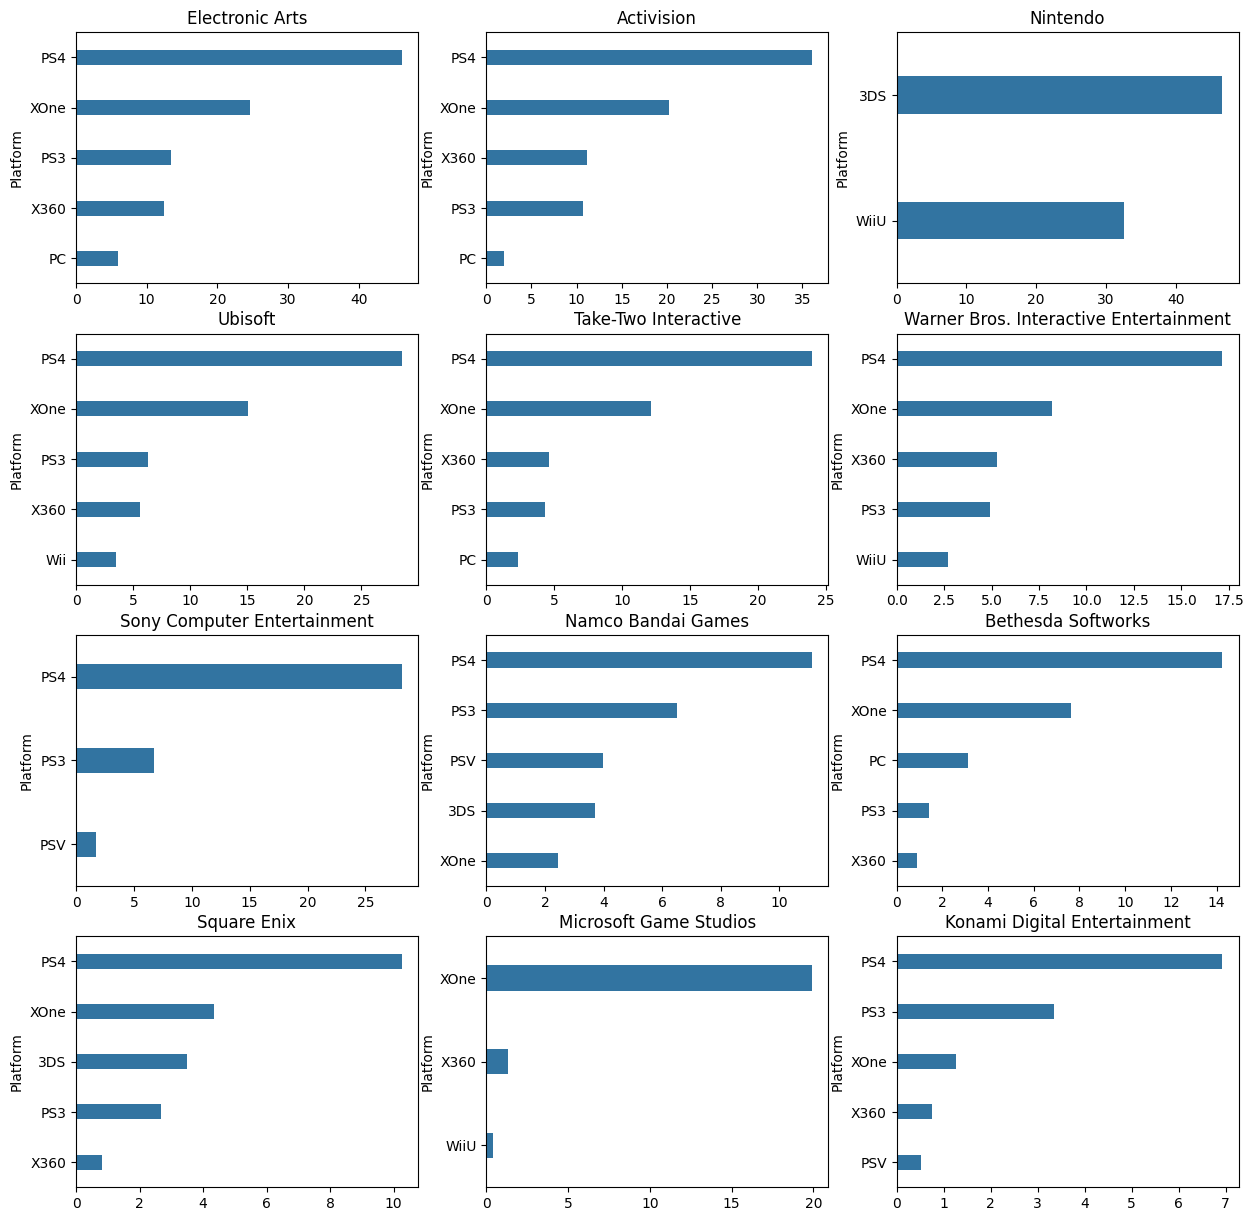

In [72]:
fig= plt.figure(figsize= (15,15))
axes= fig.subplots(4,3)
dataset= vgs2
column_main  = "Publisher"
column_minor = "Platform"
for i in range(12):
    genra_unique =  vgs2[vgs2["Year"].isin([2014,2015,2016])]
    
    bb =list(genra_unique.groupby(by=["Publisher"])["Global_Sales"].sum().sort_values(ascending = False).iloc[:12].index)
    genra_unique= bb
    
    dataset = vgs2[(vgs2[column_main] == genra_unique[i]) & (vgs2["Year"].isin([2014,2015,2016]))]
    if i<3:
     axx = axes[0,i]
    elif   i>2 and i <6:
        axx = axes[1,i-3]
    elif    i>5 and i<9:
        axx = axes[2,i-6]
    elif    i>8 and i<12:
        axx = axes[3,i-9]
        
    sns.barplot(data = dataset,y=column_minor,x= "Global_Sales",estimator='sum',errorbar=None, ax= axx,width=0.3,
            order=dataset.groupby(by=[column_minor])['Global_Sales'].sum().sort_values(ascending = False).iloc[:5].index)
    if i<3:
     axes[0,i].set_xlabel("")
     axes[0,i].set_title(genra_unique[i])
    elif   i>2 and i <6:
     axes[1,i-3].set_xlabel("")
     axes[1,i-3].set_title(genra_unique[i])
    elif    i>5 and i<9:
     axes[2,i-6].set_xlabel("")
     axes[2,i-6].set_title(genra_unique[i]) 
    elif    i>8 and i<12:
      axes[3,i-9].set_xlabel("")
      axes[3,i-9].set_title(genra_unique[i])

<H5>Example</H5>
<p>If I am a developer and I want to develop a Sport game, what is the best choices for that?

<ol>
    <li>For the Platform the best choice is PS4</li>
    <li>For the Publisher the best choice is Electronic art </li>
</ol>

Note: using the dashboard more better so, I kept the countries on it.
</p>

<h2>8 EDA</h2>

<h4>What are the top 10 selling games between 1980 - 2016 </h4>

<Axes: xlabel='Global_Sales', ylabel='Name'>

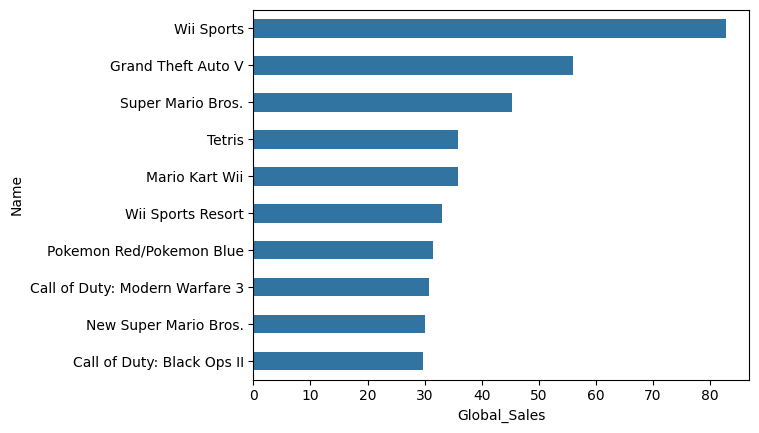

In [77]:
sns.barplot(data = vgs2,y="Name",x= "Global_Sales",estimator='sum',width = 0.5,errorbar=None,
            order=vgs2.groupby(by=['Name'])['Global_Sales'].sum().sort_values(ascending = False).iloc[:10].index)

<h4>What are the top 10 earning Publishers between 1980 - 2016? </h4>

<Axes: xlabel='Global_Sales', ylabel='Publisher'>

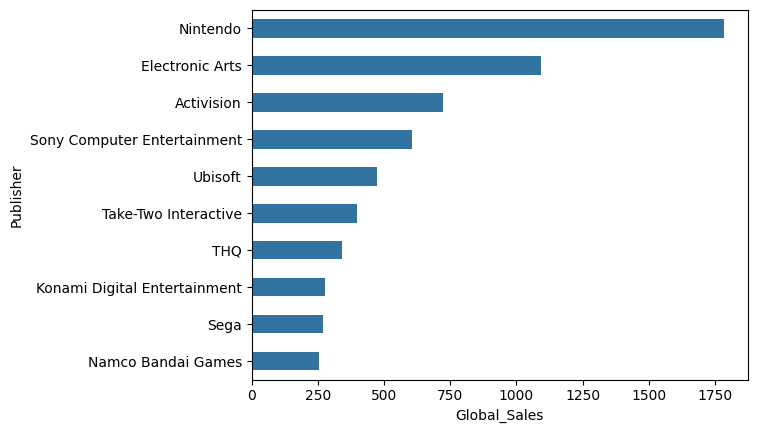

In [78]:
sns.barplot(data = vgs2,y="Publisher",x= "Global_Sales",estimator='sum',width = 0.5,errorbar=None,
            order=vgs2.groupby(by=['Publisher'])['Global_Sales'].sum().sort_values(ascending = False).iloc[:10].index)

<h4>What are the top 10 games selling in term of Platform between 1980 - 2016? </h4>

<Axes: xlabel='Global_Sales', ylabel='Platform'>

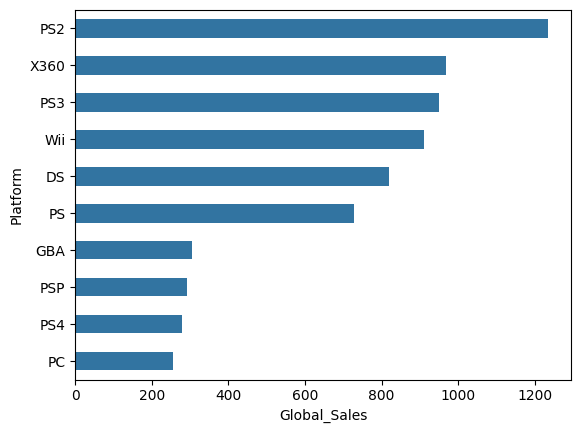

In [80]:
sns.barplot(data = vgs2,y="Platform",x= "Global_Sales",estimator='sum',width = 0.5,errorbar=None,
            order=vgs2.groupby(by=['Platform'])['Global_Sales'].sum().sort_values(ascending = False).iloc[:10].index)

<P>What is the trend between 1980-2016 for global sales?</P>

<Axes: xlabel='Year', ylabel='Global_Sales'>

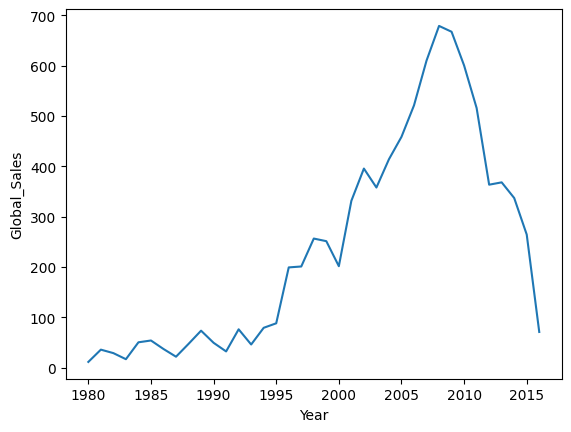

In [82]:
Year_Global_Sales = vgs2.groupby(by=['Year'])['Global_Sales'].sum()
Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
sns.lineplot(data=Year_Global_Saless, x="Year", y="Global_Sales") 

<P>We can see there are a huge increase in Global sales between 2005 - 2010

by table bellow we can see the most global sales happened in 2008 </P>

In [83]:
Year_Global_Saless[Year_Global_Saless["Year"] >2004].sort_values("Global_Sales",ascending =False)

,Year,Global_Sales
28,2008,678.90
29,2009,667.30
27,2007,609.92
30,2010,600.29
26,2006,521.04
31,2011,515.80
25,2005,458.51
33,2013,368.11
32,2012,363.49
34,2014,337.03


<p>Who are the publishers on this platform?</p>

In [84]:
two_cat_pivot(datasett = vgs2,roww = "Platform", columnn="Publisher", valuess="Global_Sales", aggregation_type="sum", number_row=10, number_column=10)

Publisher,Electronic Arts,Nintendo,Activision,Sony Computer Entertainment,Ubisoft,Take-Two Interactive,THQ,Konami Digital Entertainment,Namco Bandai Games,Sega,Grand total
Platform,,,,,,,,,,,
PS2,245.96,,85.59,172.8,33.78,90.61,75.37,81.86,49.66,30.87,866.50
X360,177.97,,158.75,,80.58,95.90,38.25,13.02,13.28,23.37,601.12
PS3,167.09,,126.39,145.76,70.82,83.87,27.23,33.17,40.43,29.43,724.19
Wii,62.11,390.34,60.06,,92.21,18.27,32.66,17.58,13.48,40.56,727.27
DS,32.95,349.1,41.81,,59.42,9.46,36.61,13.50,16.06,29.49,588.40
PS,90.46,,30.05,193.73,8.84,14.11,29.54,33.12,18.88,,418.73
GBA,14.31,112.0,15.30,,9.84,0.35,47.8,16.81,5.82,5.31,227.54
PSP,39.02,,10.81,54.09,9.49,21.66,14.14,20.01,18.15,15.44,202.81
PS4,55.32,,40.26,30.71,31.66,25.31,,6.93,11.11,1.84,203.14


<p>We can see Nintendo focus on its platform only.</p>

<p>I thought that i need to know every platform released year</p>

In [85]:
year_platform= vgs2[["Year","Platform"]].sort_values("Year")
year_platform[year_platform["Year"] ==1980]
year_platform["Year"][year_platform["Platform"]=="2600"]
platform_unique = vgs2[["Platform","Year"]].sort_values("Year").Platform.unique()
plat = []
firsty = []
endy = []
for i in range(len(vgs2["Platform"].unique())):
    ah = year_platform["Year"][year_platform["Platform"]==platform_unique[i]]
    plat.append(platform_unique[i])
    firsty.append(ah.min())
    endy.append(ah.max())
Platform_Year = pd.DataFrame({"Platform":plat,"First year":firsty,"End year":endy})
Platform_Year

,Platform,First year,End year
0,2600,1980,1989
1,NES,1983,1994
2,PC,1985,2016
3,DS,1985,2014
4,GB,1988,2001
5,SNES,1990,1999
6,GEN,1990,1994
7,GG,1992,1992
8,SCD,1993,1994
9,NG,1993,1996


<p>what is the Genre trend?</p>

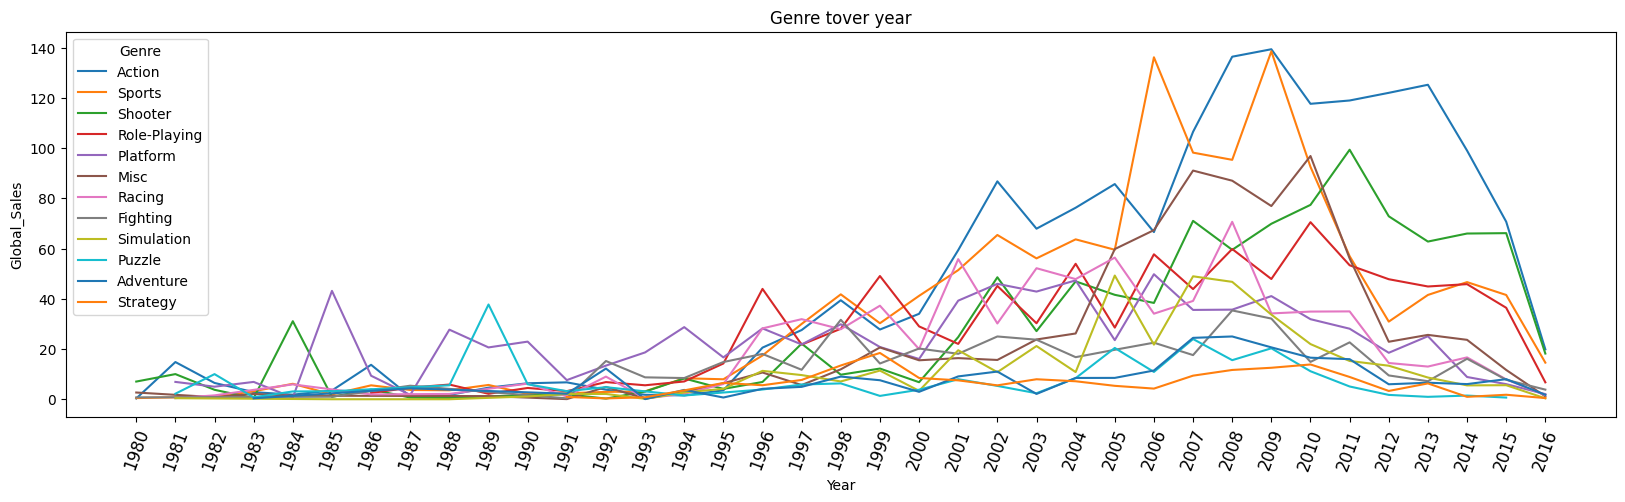

In [88]:
trend(dataset= vgs2,column="Genre",time="Year",scale="Global_Sales",legend_number=12,scale_gap=1,title="Genre tover year")

<p>We can see after 2010 the top 3 Genre selling are Action, Shooter, sport</p>

<p>what are the Platforms trend?</p>

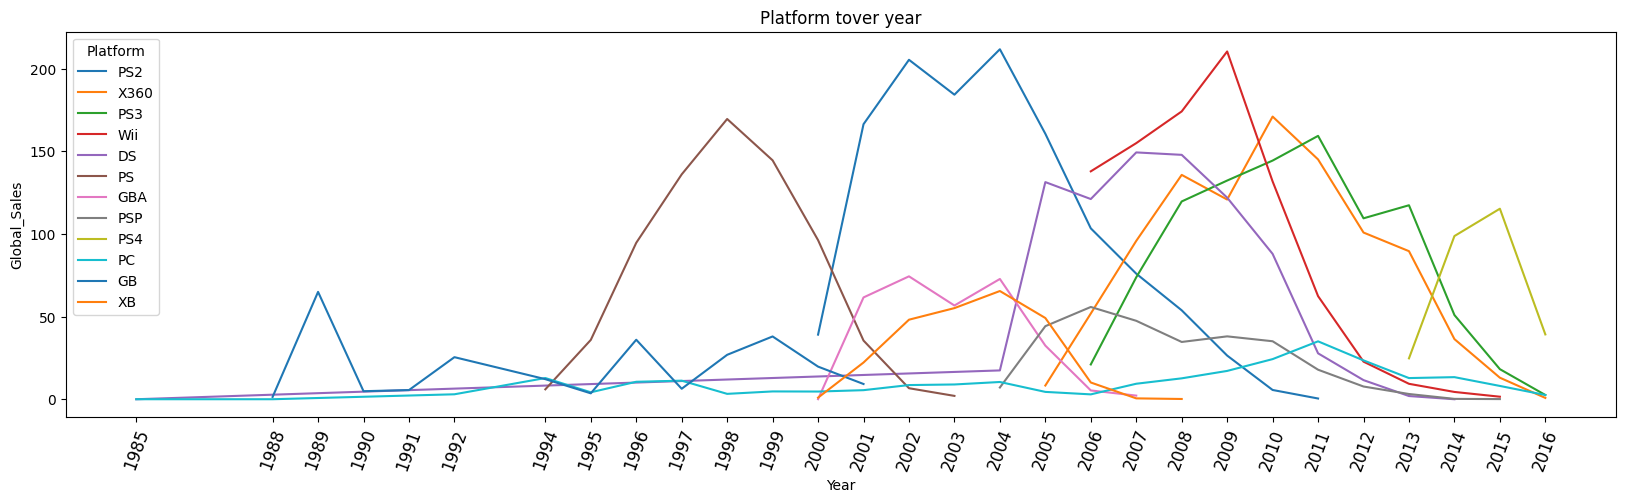

In [89]:
trend(dataset= vgs2,column="Platform",time="Year",scale="Global_Sales",legend_number=12,scale_gap=1,title="Platform tover year")

<p>what are the Publisher trend?</p>

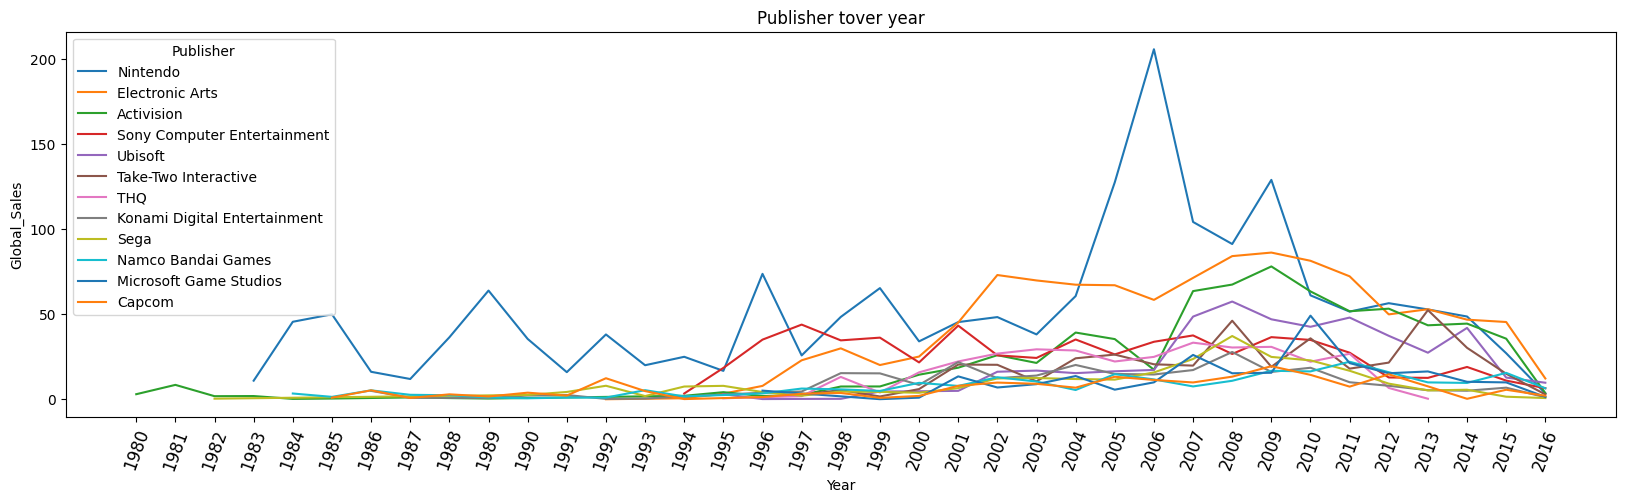

In [90]:
trend(dataset= vgs2,column="Publisher",time="Year",scale="Global_Sales",legend_number=12,scale_gap=1,title="Publisher tover year")

<p>Countries trend</p>

<Axes: xlabel='Year', ylabel='Global_Sales'>

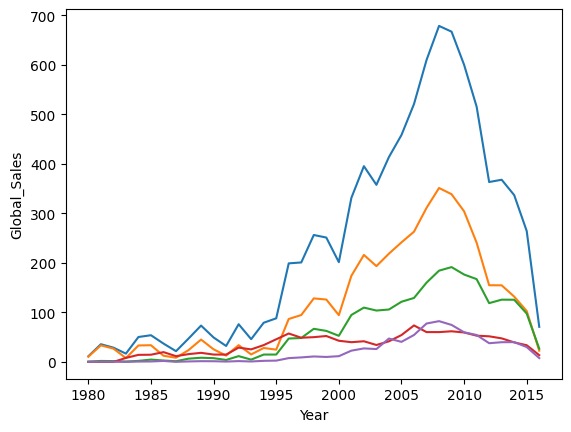

In [98]:
Year_Global_Sales = vgs2.groupby(by=['Year'])['Global_Sales'].sum()
Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
sns.lineplot(data=Year_Global_Saless, x="Year", y="Global_Sales") 

Year_Global_Sales = vgs2.groupby(by=['Year'])['NA_Sales'].sum()
Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
sns.lineplot(data=Year_Global_Saless, x="Year", y="NA_Sales") 

Year_Global_Sales = vgs2.groupby(by=['Year'])['EU_Sales'].sum()
Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
sns.lineplot(data=Year_Global_Saless, x="Year", y="EU_Sales") 

Year_Global_Sales = vgs2.groupby(by=['Year'])['JP_Sales'].sum()
Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
sns.lineplot(data=Year_Global_Saless, x="Year", y="JP_Sales") 

Year_Global_Sales = vgs2.groupby(by=['Year'])['Other_Sales'].sum()
Year_Global_Saless = pd.DataFrame(Year_Global_Sales).reset_index()
sns.lineplot(data=Year_Global_Saless, x="Year", y="Other_Sales") 


